# Goal of Project
Identify an Unsupervised Learning problem to perform EDA and model analysis. The problem I chose for my project was to try to predict passenger satisfaction based on the features in the dataset.

## Outline
1. Gather data, determine the method of data collection and provenance of the data
2. Identify an Unsupervised Learning Problem
3. Exploratory Data Analysis (EDA) - Inspect, Visualize, and Clean the Data
4. Perform Analysis Using Unsupervised Learning Models of your Choice, Present Discussion, and Conclusions
  - Should compare multiple different models
  - Discuss why specific models work better than the other and what limitations they might have
  - At least one model should be an unsupervised learning approach
  - Spend time on hyperparameter tuning

Notebook and data can be found in this [GitHub repo](https://github.com/michaelbrady4/csca-5632-unsupervised-algorithms-in-ml).

## 1: Gather data, determine the method of data collection and provenance of the data
This dataset was found on [Kaggle](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction?select=train.csv). It contains an airline passenger satisfaction survey. It can be used for two different purposes: 
1) To determine what factors are highly correlated to a satisfied (or dissatisfied) passenger
2) To see if you can predict passenger satisfaction based on the features of the dataset

The dataset is downloaded as a train.csv and test.csv. The train.csv has 103,904 rows and the test.csv has 25,976 rows. Both have 23 columns. They are the following:
1. Gender: Gender of the passengers (Female, Male)
2. Customer Type: The customer type (Loyal customer, disloyal customer)
3. Age: The actual age of the passengers
4. Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)
5. Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
6. Flight distance: The flight distance of this journey
7. Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
8. Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient
9. Ease of Online booking: Satisfaction level of online booking
10. Gate location: Satisfaction level of Gate location
11. Food and drink: Satisfaction level of Food and drink
12. Online boarding: Satisfaction level of online boarding
13. Seat comfort: Satisfaction level of Seat comfort
14. Inflight entertainment: Satisfaction level of inflight entertainment
15. On-board service: Satisfaction level of On-board service
16. Leg room service: Satisfaction level of Leg room service
17. Baggage handling: Satisfaction level of baggage handling
18. Check-in service: Satisfaction level of Check-in service
19. Inflight service: Satisfaction level of inflight service
20. Cleanliness: Satisfaction level of Cleanliness
21. Departure Delay in Minutes: Minutes delayed when departure
22. Arrival Delay in Minutes: Minutes delayed when Arrival
23. Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

## 2: Identify an Unsupervised Learning Problem
The problem I will be solving with Unsupervised Learning is trying to predict passenger satisfaction based on the features of the dataset. Since the train and test data is labeled, I will be removing it to try to see how a clustering approach would apply to this problem. I will also be comparing the results with a Supervised Learning approach as well.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
train = pd.read_csv('train.csv')
columns = ['Unnamed: 0', 'id']
train.drop(columns=columns, inplace=True)
print(train.shape)
print(train.columns)

(103904, 23)
Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')


In [3]:
test = pd.read_csv('test.csv')
test.drop(columns=columns, inplace=True)
print(test.shape)
print(test.columns)

(25976, 23)
Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')


## 3: Exploratory Data Analysis (EDA) - Inspect, Visualize, and Clean the Data
Steps we will take:
1. Inspecting the data: This includes checking for data types, missing values, and understanding the basic statistics of the dataset.
2. Visualizing the data: We'll create visualizations to understand the distributions and relationships between variables.
3. Cleaning the data: This involves handling missing values, removing duplicates, and possibly correcting any anomalies or outliers.

In [4]:
# Getting a view of the training and testing datasets
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
test.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


The datasets consist of various features related to passenger experiences on flights, including demographics, travel details, and service ratings. Each row represents a single passenger's feedback about their flight.

Next, let's inspect the structure of these datasets more thoroughly, including data types, any missing values, and basic descriptive statistics for each column. This will help us understand the data better and identify any initial cleaning steps we need to perform.

In [6]:
# Display data types, any missing values, and descriptive statistics for the training data
data_info = pd.DataFrame({
    "Data Type": train.dtypes,
    "Missing Values": train.isnull().sum(),
    "Num Unique": train.nunique()
})

# Summary statistics for numerical features
stats = train.describe()

data_info, stats

(                                  Data Type  Missing Values  Num Unique
 Gender                               object               0           2
 Customer Type                        object               0           2
 Age                                   int64               0          75
 Type of Travel                       object               0           2
 Class                                object               0           3
 Flight Distance                       int64               0        3802
 Inflight wifi service                 int64               0           6
 Departure/Arrival time convenient     int64               0           6
 Ease of Online booking                int64               0           6
 Gate location                         int64               0           6
 Food and drink                        int64               0           6
 Online boarding                       int64               0           6
 Seat comfort                          int64       

### Data Overview
- The dataset consists of multiple features like Gender, Customer Type, Age, Type of Travel, Class, and various service ratings (e.g., Inflight wifi service, Seat comfort).
- There are 103,904 entries in the training dataset, with each feature having up to the same number of entries except for Arrival Delay in Minutes, which has 310 missing values.
- Most features are integers, representing ratings from passengers, and a few are categorical (e.g., Gender, Customer Type).
### Missing Values
- The only feature with missing values is Arrival Delay in Minutes. We'll need to decide whether to fill these missing values or drop them, depending on their importance and the total data size.
### Descriptive Statistics
- Ratings vary from 0 to 5 or 0 to 6, indicating survey responses. This uniformity in scale will make some analyses straightforward.
- Continuous variables like Age and Flight Distance show a reasonable range, suggesting they're correctly recorded.
- There's significant variability in Departure Delay in Minutes and Arrival Delay in Minutes, with both having maximum values significantly higher than the 75th percentile, indicating potential outliers.
### Next Steps
1. Handle Missing Values: Decide on a strategy for the missing values in Arrival Delay in Minutes.
2. Outliers Analysis: Examine potential outliers, especially in delay durations.
3. Visualize Data: Create visualizations for categorical data distributions and relationships between variables, particularly how different features relate to passenger satisfaction.
4. Prepare Data for Modeling: Depending on the model requirements, this might involve encoding categorical variables and normalizing or standardizing numerical features.

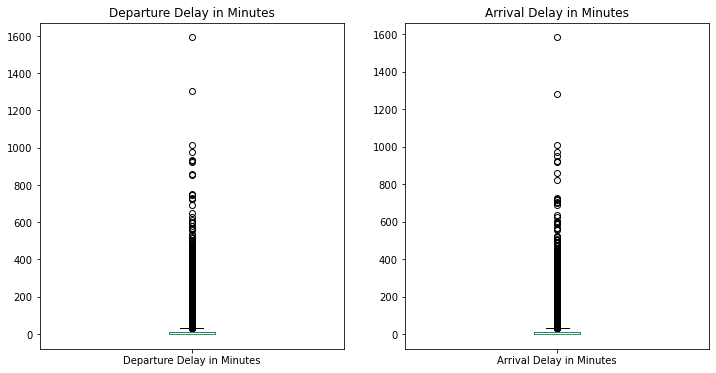

0

In [7]:
# Impute missing values in 'Arrival Delay in Minutes' with the median
median_arrival_delay = train['Arrival Delay in Minutes'].median()
train['Arrival Delay in Minutes'].fillna(median_arrival_delay, inplace=True)

# Check if there are any more missing values in the column
missing_after_imputation = train['Arrival Delay in Minutes'].isnull().sum()

# Visualize the distribution of 'Departure Delay in Minutes' and 'Arrival Delay in Minutes' to check for outliers
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
train['Departure Delay in Minutes'].plot(kind='box', ax=ax[0], title='Departure Delay in Minutes')
train['Arrival Delay in Minutes'].plot(kind='box', ax=ax[1], title='Arrival Delay in Minutes')
plt.show()

missing_after_imputation

The missing values in Arrival Delay in Minutes have been successfully imputed with the median, and no missing values remain.

### Outlier Analysis:
From the box plots of Departure Delay in Minutes and Arrival Delay in Minutes, we can see that both features have a significant number of outliers, as indicated by the points beyond the whiskers of the box plots. These outliers could represent actual delays and may be important for understanding passenger dissatisfaction.

### Next Steps for EDA:
1. Visualize Categorical Data: We'll create visualizations for the distributions of categorical features and their relationship with passenger satisfaction.
2. Visualize Relationships: Examine the relationships between various service ratings and passenger satisfaction.
3. Correlation Analysis: Explore the correlations between numerical features to see how they relate to each other, which might help in feature selection for modeling.

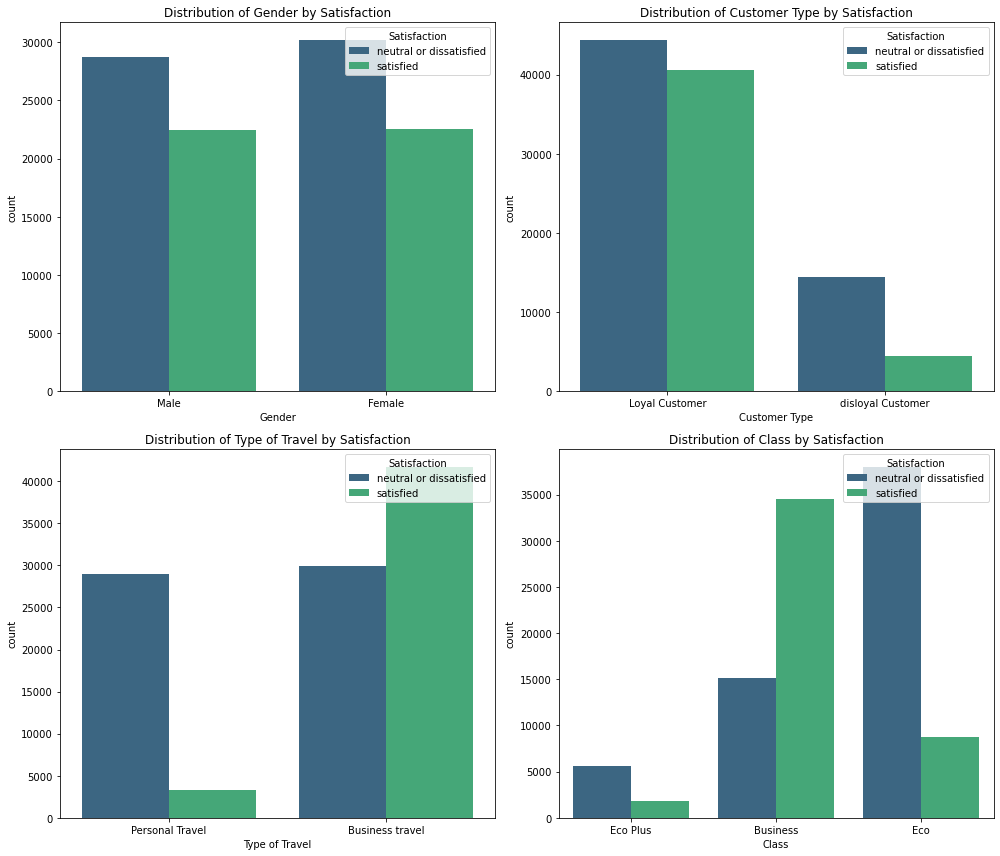

In [8]:
# Categorical features to analyze
categorical_features = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
axes = axes.flatten()

# Plotting each categorical feature's distribution and its relationship with satisfaction
for i, cat_feature in enumerate(categorical_features):
    # Create a countplot for each categorical feature by satisfaction
    sns.countplot(x=cat_feature, hue='satisfaction', data=train, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of {cat_feature} by Satisfaction')
    axes[i].legend(title='Satisfaction', loc='upper right')

plt.tight_layout()
plt.show()

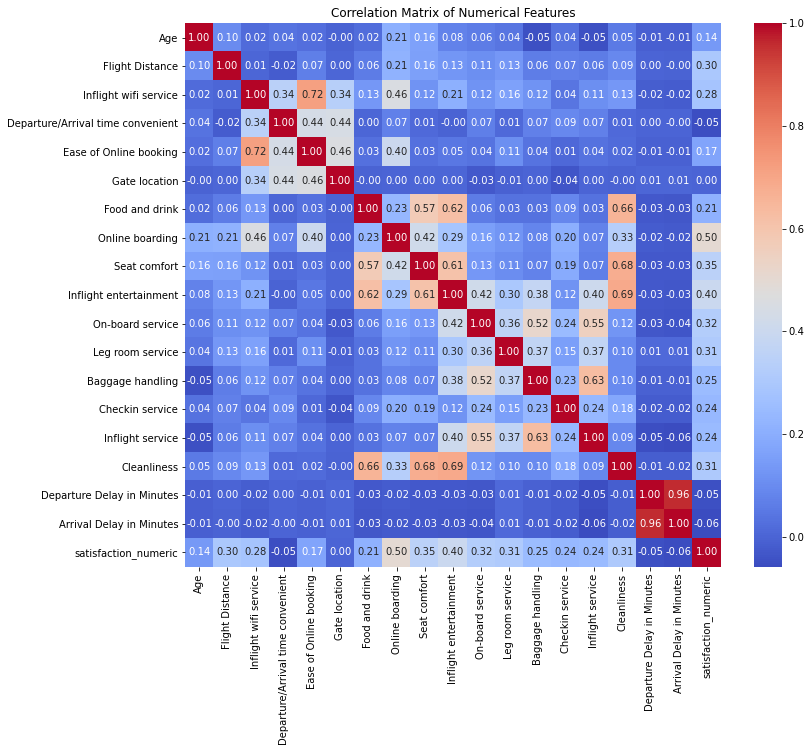

In [9]:
# Encode 'satisfaction' as a numeric variable: 1 for 'satisfied' and 0 for 'neutral or dissatisfied'
train['satisfaction_numeric'] = (train['satisfaction'] == 'satisfied').astype(int)

# List of numerical features including the newly created 'satisfaction_numeric'
numerical_features = ['Age', 'Flight Distance', 'Inflight wifi service',
                      'Departure/Arrival time convenient', 'Ease of Online booking',
                      'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
                      'Inflight entertainment', 'On-board service', 'Leg room service',
                      'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness',
                      'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction_numeric']

# Compute the correlation matrix
correlation_matrix = train[numerical_features].corr()

# Generate a heatmap of the correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Numerical Features")
plt.show()


1. High Correlations: There are several features with high correlation to the target variable (satisfaction), which are likely to be strong predictors in a model. For example, features with correlation values around 0.5 or higher stand out.
2. Service Ratings: Some service quality related features, such as online boarding and inflight entertainment, appear to have higher correlations with satisfaction. This indicates that these aspects may have a significant impact on overall passenger satisfaction.
3. Negative Correlations: There are some features negatively correlated with satisfaction, though they seem to have lower correlation values. This could mean that as these feature values increase, the likelihood of a passenger being satisfied decreases.
4. Low Correlations: Some features have very low correlation values, indicating a weak linear relationship with the satisfaction variable. These features may not be useful predictors by themselves for the satisfaction outcome.
5. Potential Multicollinearity: There are some pairs of independent variables that have high correlations with each other. This multicollinearity could potentially affect the performance of some types of models and may need to be addressed.

I will be using a threshold of 0.28 to select my features

In [10]:
# Correlation threshold
correlation_threshold = 0.28

# features_to_select would be a list of feature names that have a correlation above the threshold
satisfaction_correlations = train[numerical_features].corr()['satisfaction_numeric']
features_to_select = satisfaction_correlations[satisfaction_correlations.abs() >= correlation_threshold].index.tolist()

# Now, we select only these features from the dataset (excluding the target variable itself)
selected_features_data = train[features_to_select].drop('satisfaction_numeric', axis=1)

# Output the selected feature names for confirmation
selected_features_data.columns.tolist()


['Flight Distance',
 'Inflight wifi service',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Cleanliness']

In [11]:
correlation_threshold = 0.28
high_corr_features = correlation_matrix[correlation_matrix['satisfaction_numeric'].abs() >= correlation_threshold].index

# Remove 'satisfaction_numeric' if it's included
high_corr_features = [feature for feature in high_corr_features if feature != 'satisfaction_numeric']

# Now you can select these features from your DataFrame
selected_features_df = train[high_corr_features]
selected_features_df

,Flight Distance,Inflight wifi service,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Cleanliness
0,460,3,3,5,5,4,3,5
1,235,3,3,1,1,1,5,1
2,1142,2,5,5,5,4,3,5
3,562,2,2,2,2,2,5,2
4,214,3,5,5,3,3,4,3
...,...,...,...,...,...,...,...,...
103899,192,2,2,2,2,3,1,2
103900,2347,4,4,5,5,5,5,4
103901,1995,1,1,5,4,3,2,4
103902,1000,1,1,1,1,4,5,1


## 4. Perform Analysis Using Unsupervised Learning Models of your Choice, Present Discussion, and Conclusions

### Unsupervised Learning with K-Means Clustering:
- We'll scale the features as clustering algorithms are sensitive to the scale of the data.
- We'll run the algorithm with a range of k values and use the elbow method to determine the optimal number of clusters.

### Supervised Learning with Baseline Models:
- We'll create a logistic regression, a decision tree, and a random forest model as our baseline supervised models.
- We'll use cross-validation to evaluate the performance of these baseline models.

### Hyperparameter Tuning:
- We'll select one or two models based on their performance and tune their hyperparameters using techniques like Grid Search or Random Search.

In [12]:
X = selected_features_df
y = train['satisfaction_numeric']

### Unsupervised Learning with K-Means Clustering

In [13]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use the elbow method to find the optimal number of clusters
wcss = []
silhouette_coeffs = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_coeffs.append(silhouette_score(X_scaled, kmeans.labels_))


/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

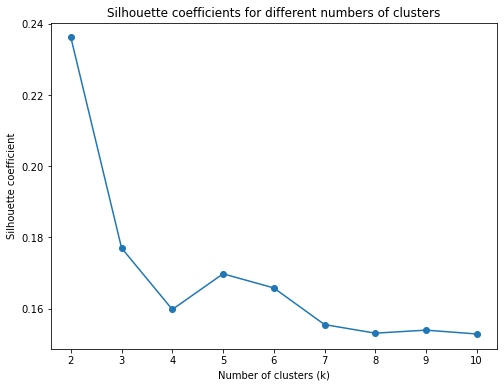

The best number of clusters by silhouette score is 2


In [14]:
k_values = list(range(2, 11))

plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_coeffs, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette coefficient')
plt.title('Silhouette coefficients for different numbers of clusters')
plt.show()

# The best 'k' is the one with the highest silhouette coefficient
best_k = k_values[silhouette_coeffs.index(max(silhouette_coeffs))]
print(f'The best number of clusters by silhouette score is {best_k}')

In [15]:
# Initialize K-Means with the best number of clusters
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the model to the scaled data
kmeans.fit(X_scaled)

# Assign clusters to each data point
labels = kmeans.labels_

# Assess the model's performance
print(f"Silhouette Coefficient for k=2: {silhouette_score(X_scaled, labels):.4f}")

cluster_distribution = pd.Series(labels).value_counts()
print(f"Cluster distribution:\n{cluster_distribution}")

centroids = kmeans.cluster_centers_

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Coefficient for k=2: 0.2362
Cluster distribution:
1    58095
0    45809
dtype: int64


### Now to evaluate the Kmeans model on the test data
1. Prepare the Test Data: Ensure that the test data is preprocessed in the same way as the training data. This includes selecting the same features and scaling them using the same parameters as those used for training.
2. Predict Clusters: Use the trained K-Means model to assign cluster labels to the test data.
3. Evaluate Performance: Compare the predicted cluster labels with the actual labels in the test data.

In [16]:
# Assuming 'scaler' was fitted on the training data
X_test_scaled = scaler.transform(test[selected_features_data.columns.tolist()])
X_test_scaled

array([[-1.03239847,  1.70980371,  0.55548224, ...,  1.25559028,
         1.25338045,  1.30586973],
       [ 1.67834753, -1.30264581,  0.55548224, ...,  0.47940258,
         0.49327001,  1.30586973],
       [-1.00030677, -0.54953343, -0.92654544, ...,  0.47940258,
        -1.78706132, -0.98025121],
       ...,
       [-0.36248418, -0.54953343, -1.66755928, ...,  0.47940258,
        -0.26684044, -0.98025121],
       [-0.06262733,  0.20357895,  0.55548224, ..., -0.29678512,
        -1.02695088,  0.54382941],
       [-0.92810044, -0.54953343, -0.92654544, ..., -1.84916053,
        -1.02695088, -1.74229153]])

In [17]:
# Use the trained K-Means model to predict clusters
test_labels = kmeans.predict(X_test_scaled)

In [18]:
# You need actual labels to compare
y_true = test['satisfaction']  # or whatever the label column is named

# Map clusters to labels based on the most frequent label in each cluster (requires domain knowledge or assumption)
cluster_to_label_map = {
    0: 'neutral or dissatisfied',  # Example mapping
    1: 'satisfied'                # Example mapping
}

# Convert cluster labels to the most likely actual labels
y_pred = [cluster_to_label_map[label] for label in test_labels]

# Evaluate using classification report
print(classification_report(y_true, y_pred))
print(confusion_matrix(y_true, y_pred))


                         precision    recall  f1-score   support

neutral or dissatisfied       0.83      0.65      0.73     14573
              satisfied       0.65      0.83      0.73     11403

               accuracy                           0.73     25976
              macro avg       0.74      0.74      0.73     25976
           weighted avg       0.75      0.73      0.73     25976

[[9441 5132]
 [1943 9460]]


### Supervised Modeling with Base Models

In [19]:
# Initialize the models
logreg = LogisticRegression(max_iter=1000)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)

# Dictionary to hold the models
models = {
    'Logistic Regression': logreg,
    'Decision Tree': decision_tree,
    'Random Forest': random_forest
}

# Function to evaluate each model using cross-validation
def evaluate_models(models, X, y):
    results = {}
    for name, model in models.items():
        cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  # Using accuracy for evaluation
        results[name] = cv_scores.mean()
        print(f"{name} CV Accuracy: {cv_scores.mean():.4f}")
    return results

# Evaluate the models
model_results = evaluate_models(models, X_scaled, y)

# Determine the best performing model
best_model = max(model_results, key=model_results.get)
print(f"The best performing model is {best_model} with an accuracy of {model_results[best_model]:.4f}.")


Logistic Regression CV Accuracy: 0.8180
Decision Tree CV Accuracy: 0.8859
Random Forest CV Accuracy: 0.9057
The best performing model is Random Forest with an accuracy of 0.9057.


### Hyperparameter Tuning
As you can see from above the Random Forest base model performed the best so we will continue with that model for the hyperparameter tuning

In [20]:
# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_scaled, y)

# Best estimator
best_rf = grid_search.best_estimator_
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 162 candidates, totalling 810 fits


/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
405 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
41 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklear

Best parameters found: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Best cross-validation accuracy: 0.9169


In [21]:
# Evaluate the tuned model
# Predict on the test data
y_pred = best_rf.predict(X_test_scaled)

# Test data labels
y_true = (test['satisfaction'] == 'satisfied').astype(int)
# train['satisfaction_numeric'] = (train['satisfaction'] == 'satisfied').astype(int)

# Evaluate using classification report
accuracy = accuracy_score(y_true, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_true, y_pred))
print(confusion_matrix(y_true, y_pred))

Test Accuracy: 0.9141
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92     14573
           1       0.91      0.89      0.90     11403

    accuracy                           0.91     25976
   macro avg       0.91      0.91      0.91     25976
weighted avg       0.91      0.91      0.91     25976

[[13603   970]
 [ 1262 10141]]


### Comparing Performance of K-Means with Random Forest

The performance difference between the K-Means clustering model and the Random Forest classifier can be attributed to several key factors inherent to their algorithms and the nature of the task, which is predicting passenger satisfaction. Here are some potential reasons why Random Forest might have scored better:

1. Nature of the Algorithms:
- K-Means is an unsupervised learning algorithm that groups data into clusters based on feature similarity but without any prior knowledge of the outcomes. It doesn’t utilize any target labels during training, as its goal is to find inherent structures or patterns in the data. This lack of guidance from outcome labels generally makes it less accurate for predictive tasks where specific outcomes (like 'satisfied' or 'not satisfied') are to be predicted based on historical labeled data.
- Random Forest, on the other hand, is a supervised learning algorithm that builds multiple decision trees and merges them together to get a more accurate and stable prediction. It directly uses the target labels during training, enabling it to learn complex patterns that closely map inputs (features) to the desired output (satisfaction), making it inherently more suited for classification tasks.
2. Ability to Handle Complexity:
- K-Means assumes that clusters are spherical and evenly sized, which might not always be true in real-world data, especially in a complex dataset like passenger satisfaction, where the influence of features can be non-linear and interactions between features can affect the outcome.
- Random Forest can capture non-linearities and interactions between features without any special transformation of the data, thanks to its ensemble approach that combines multiple trees considering various subsets of features and data points. This ability makes it powerful in handling complex datasets where relationships between features and the target variable are not straightforward.
3. Performance Metrics:
- Precision, recall, and F1 scores are directly related to how well the model identifies true positives, true negatives, false positives, and false negatives. In supervised models like Random Forest, the training process optimizes for these aspects by leveraging the actual labels, thus generally producing higher scores in these metrics.
- Since K-Means is unsupervised, the clusters it forms are based purely on feature similarity, without any regard to optimizing these particular performance metrics. The clusters might not align perfectly with the categorical labels needed for precise classification, leading to lower scores.
4. Generalization and Robustness:
- Random Forest reduces overfitting and increases the robustness of predictions through its ensemble method, where the final decision is made based on a majority vote among all the trees. This process naturally helps in generalizing better to unseen data compared to a single model or less complex models.
- The performance of K-Means can significantly vary depending on the choice of initial centroids and the distribution of data points, which might affect its reliability and consistency across different datasets or subsets of data.

### Conclusion:
Given these considerations, Random Forest is generally more effective and reliable for predictive tasks like passenger satisfaction prediction. It utilizes the labels to learn and can handle complex, non-linear relationships in data, resulting in higher precision, recall, and F1 scores. While K-Means provides valuable insights and can be useful for segmenting data into meaningful groups, its applicability as a predictive tool is limited compared to supervised methods, especially in tasks where the prediction accuracy is crucial.